# Internship Success Analytics - Data Exploration

## Project Overview
Analyzing student data to predict academic success and identify at-risk students.

**Dataset**: `data/cleaned_data/jcu_student_cleaned.csv`

**Goals**:
- Explore and understand the dataset structure
- Identify data quality issues
- Perform initial analysis on key variables
- Apply rules from documentation/rules/ directory

## Setup and Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Load the dataset
data_path = '../data/cleaned_data/updated_student_data_cleaned.csv'
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset shape: (698, 41)
Columns: ['student_id', 'course', 'student_cohort', 'academic_status', 'failed_subjects', 'study_skills(attended)', 'referral', 'pp_meeting', 'self_assessment', 'readiness_assessment_results', 'follow_up', 'follow_up_type', 'subject_1', 'subject_1_assess_1', 'subject_1_assess_2', 'subject_1_assess_3', 'subject_1_assess_4', 'attendance_1', 'learn_jcu_issues_1', 'lecturer_referral_1', 'subject_2', 'subject_2_assess_1', 'subject_2_assess_2', 'subject_2_assess_3', 'subject_2_assess_4', 'attendance_2', 'learn_jcu_issues_2', 'lecturer_referral_2', 'subject_3', 'subject_3_assess_1', 'subject_3_assess_2', 'subject_3_assess_3', 'subject_3_assess_4', 'attendance_3', 'learn_jcu_issues_3', 'lecturer_referral_3', 'comments', 'identified_issues', 'course_group', 'Risk', 'Country']


## Initial Data Exploration

In [3]:
# Basic information about the dataset
print("=== Dataset Info ===")
df.info()

print("\n=== First 5 rows ===")
df.head()

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    698 non-null    int64  
 1   course                        698 non-null    object 
 2   student_cohort                698 non-null    object 
 3   academic_status               698 non-null    object 
 4   failed_subjects               698 non-null    int64  
 5   study_skills(attended)        171 non-null    object 
 6   referral                      698 non-null    object 
 7   pp_meeting                    698 non-null    object 
 8   self_assessment               698 non-null    object 
 9   readiness_assessment_results  698 non-null    object 
 10  follow_up                     698 non-null    object 
 11  follow_up_type                698 non-null    object 
 12  subject_1                     698 non-null 

,student_id,course,student_cohort,academic_status,failed_subjects,study_skills(attended),referral,pp_meeting,self_assessment,readiness_assessment_results,follow_up,follow_up_type,subject_1,subject_1_assess_1,subject_1_assess_2,subject_1_assess_3,subject_1_assess_4,attendance_1,learn_jcu_issues_1,lecturer_referral_1,subject_2,subject_2_assess_1,subject_2_assess_2,subject_2_assess_3,subject_2_assess_4,attendance_2,learn_jcu_issues_2,lecturer_referral_2,subject_3,subject_3_assess_1,subject_3_assess_2,subject_3_assess_3,subject_3_assess_4,attendance_3,learn_jcu_issues_3,lecturer_referral_3,comments,identified_issues,course_group,Risk,Country
0,1,master of business administration,SRI to JCUB,Satisfactory,0,NaN,Student Counsellor,Booked,Yes,L/G:9/10 N:5/10 R:8/10,Yes,No Reply,LB5113,7.70,27.22,26.51,50.09,79.088909,Access,Concern for Welfare,LB5202,69.33,44.44,11.39,18.78,83.130725,Access,Attendance,LB5205,39.02,17.71,94.50,9.83,67.422366,Access,Non Submission,Week 8. Student re-engaged with tutorials. Sub...,NaN,Non-IT,NaN,Australia
1,2,master of business administration,Continuing,Satisfactory,0,NaN,Student Advocate,Not relevant,Yes,L/G:9/10 N:5/10 R:8/10,No,Phone,LB5113,31.14,54.66,81.72,1.96,90.530594,Access,Non Submission,LB5202,95.23,48.61,14.68,44.77,88.458850,No Access,Concern for Welfare,LB5205,3.72,38.52,25.80,11.80,79.408278,No Access,Non Submission,booked to see a doctor. Week 5. Student contac...,NaN,Non-IT,NaN,Australia
2,3,master of business administration,First year,Satisfactory,2,Writing,Enrollment,Attended,Yes,L/G:9/10 N:5/10 R:8/10,Yes,Phone,LB5113,39.09,75.39,84.62,82.66,92.960846,No Access,Attendance,LB5202,86.20,98.80,71.57,96.08,78.588863,No Access,Concern for Welfare,LB5205,77.77,77.27,81.95,62.35,90.362433,Access,Attendance,Week 8. Student re-engaged with tutorials. Sub...,NaN,Non-IT,NaN,Bangladesh
3,4,master of business administration,New,Satisfactory,0,Essential Skills,Student Advocate,Attended,No,L/G:9/10 N:5/10 R:8/10,No,F2F,LB5113,88.59,84.36,3.79,26.05,91.636639,Access,Concern for Welfare,LB5202,7.69,25.96,49.83,17.77,98.105263,Access,Non Submission,LB5205,95.41,8.93,3.21,99.15,100.000000,Access,Concern for Welfare,Week 6. Student submitted assessment late. Ext...,Death in family,Non-IT,NaN,Bhutan
4,5,master of business administration,Continuing,Satisfactory,0,NaN,Student Counsellor,Not relevant,No,L/G:9/10 N:5/10 R:8/10,Yes,No Reply,LB5113,0.98,13.80,53.40,39.69,93.779659,Access,Attendance,LB5202,60.51,57.47,15.80,33.59,100.000000,No Access,Concern for Welfare,LB5205,90.12,52.18,36.05,20.65,86.888947,Access,Concern for Welfare,Week 3 late enrolment. Student finding it diff...,NaN,Non-IT,NaN,Bhutan


In [4]:
# Summary statistics
print("=== Numerical Columns Summary ===")
df.describe()

=== Numerical Columns Summary ===


,student_id,failed_subjects,subject_1_assess_1,subject_1_assess_2,subject_1_assess_3,subject_1_assess_4,attendance_1,subject_2_assess_1,subject_2_assess_2,subject_2_assess_3,subject_2_assess_4,attendance_2,subject_3_assess_1,subject_3_assess_2,subject_3_assess_3,subject_3_assess_4,attendance_3,Risk
count,698.00000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,0.0
mean,349.50000,0.243553,51.630702,49.795143,49.373854,49.085115,69.479900,52.323109,47.862307,49.632564,49.229971,70.226146,50.648266,48.930129,48.603209,52.616834,69.987971,NaN
std,201.63953,0.859245,28.580143,29.158082,29.734640,28.602086,18.385177,28.602609,29.092952,28.842227,29.315302,17.866746,29.296110,27.774693,28.930261,29.636141,18.188424,NaN
min,1.00000,0.000000,0.150000,0.010000,0.090000,0.290000,0.000000,0.160000,0.300000,0.040000,0.040000,30.000000,0.120000,0.190000,0.310000,0.150000,30.000000,NaN
25%,175.25000,0.000000,27.815000,22.607500,23.327500,23.345000,57.785848,27.772500,22.522500,25.142500,24.667500,57.714441,24.262500,25.317500,25.707500,26.057500,56.340228,NaN
50%,349.50000,0.000000,52.105000,49.780000,47.630000,49.385000,72.240000,53.340000,46.940000,50.740000,48.945000,71.428213,52.440000,46.675000,48.550000,55.685000,70.844739,NaN
75%,523.75000,0.000000,75.647500,75.565000,76.180000,73.917500,83.352361,77.520000,72.977500,73.500000,75.237500,83.744113,76.347500,71.302500,73.605000,78.545000,84.459943,NaN
max,698.00000,8.000000,99.980000,99.920000,99.680000,99.920000,95.240000,99.910000,99.870000,99.990000,99.840000,100.000000,99.890000,99.710000,99.910000,99.990000,100.000000,NaN


In [5]:
# Check for missing values
print("=== Missing Values ===")
missing_vals = df.isnull().sum()
missing_percent = (missing_vals / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_vals,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)

=== Missing Values ===
                        Missing Count  Missing Percentage
Risk                              698          100.000000
study_skills(attended)            527           75.501433
identified_issues                 437           62.607450


## Target Variable Analysis

=== Academic Status Distribution ===
academic_status
Satisfactory        621
Conditional          45
Academic Caution     26
Excluded              6
Name: count, dtype: int64

Percentages:
academic_status
Satisfactory        88.968481
Conditional          6.446991
Academic Caution     3.724928
Excluded             0.859599
Name: proportion, dtype: float64


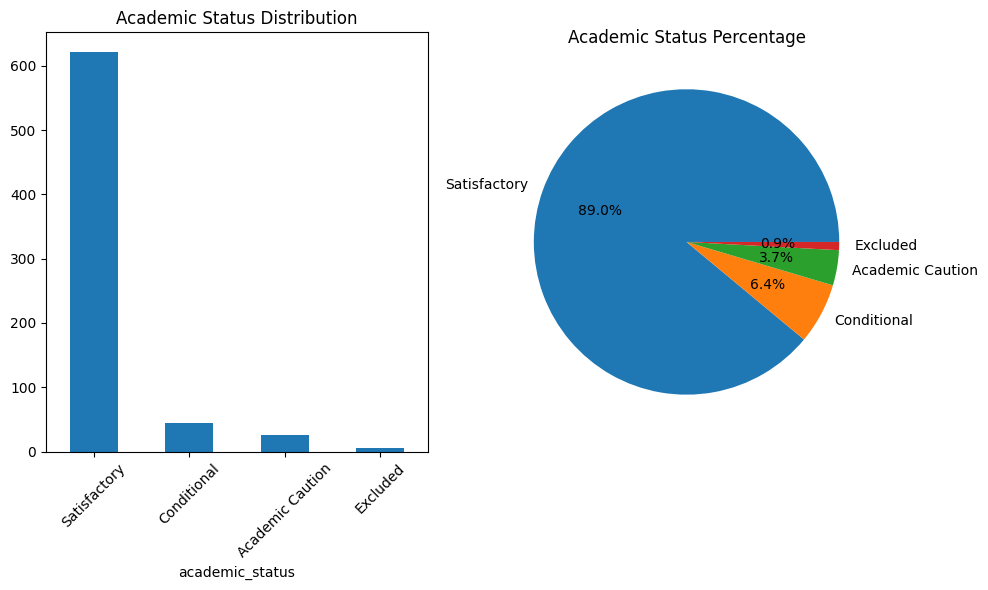

In [6]:
# Analyze the target variable (academic_status)
if 'academic_status' in df.columns:
    print("=== Academic Status Distribution ===")
    status_counts = df['academic_status'].value_counts()
    print(status_counts)
    print(f"\nPercentages:")
    print(df['academic_status'].value_counts(normalize=True) * 100)

    # Visualize target distribution
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df['academic_status'].value_counts().plot(kind='bar')
    plt.title('Academic Status Distribution')
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    df['academic_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Academic Status Percentage')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()
else:
    print("Academic status column not found. Available columns:")
    print(list(df.columns))

## Feature Analysis

### Attendance Features

In [ ]:
# Analyze attendance columns
attendance_cols = [col for col in df.columns if 'attendance' in col.lower()]
print(f"Attendance columns found: {attendance_cols}")

if attendance_cols:
    for col in attendance_cols:
        print(f"\n=== {col} ===")
        print(f"Data type: {df[col].dtype}")
        print(f"Unique values: {df[col].nunique()}")
        print(f"Value counts:")
        print(df[col].value_counts().head(10))

### Assessment Features

In [ ]:
# Analyze assessment columns
assessment_cols = [col for col in df.columns if 'assess' in col.lower()]
print(f"Assessment columns found: {assessment_cols}")

if assessment_cols:
    print("\n=== Assessment Statistics ===")
    df[assessment_cols].describe()

### Subject Features

In [ ]:
# Analyze subject columns
subject_cols = [col for col in df.columns if 'subject' in col.lower()]
print(f"Subject columns found: {subject_cols}")

if subject_cols:
    for col in subject_cols:
        if df[col].dtype == 'object':  # Categorical
            print(f"\n=== {col} ===")
            print(f"Unique values: {df[col].nunique()}")
            print(df[col].value_counts().head(10))

## Data Quality Assessment

In [ ]:
# Check for duplicates
print(f"=== Duplicate Rows ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicate student IDs
if 'student_id' in df.columns:
    duplicate_ids = df['student_id'].duplicated().sum()
    print(f"Number of duplicate student IDs: {duplicate_ids}")
    if duplicate_ids > 0:
        print("Duplicate student IDs:")
        print(df[df['student_id'].duplicated(keep=False)]['student_id'].value_counts())

In [ ]:
# Data type consistency check
print("=== Data Types ===")
for col in df.columns:
    print(f"{col}: {df[col].dtype} (unique: {df[col].nunique()})")

## Notes and Next Steps

**Observations:**
- [Add observations here as we explore]

**Data Quality Issues Identified:**
- [Add issues here]

**Next Steps:**
- Apply rules from documentation/rules/ directory
- Implement data cleaning strategies
- Feature engineering based on domain knowledge
- Correlation analysis between features and target

## Categorical Variables Analysis

Following project requirements:
1. Extract unique values of each categorical variable
2. Check value distribution of each categorical variable  
3. Print number of missing values for each column

In [ ]:
# Identify categorical variables (object dtype)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns found: {len(categorical_cols)}")
print(f"Columns: {categorical_cols}")

# Analysis for each categorical variable
categorical_analysis = {}

for col in categorical_cols:
    print(f"\n{'='*60}")
    print(f"ANALYSIS FOR: {col}")
    print(f"{'='*60}")

    # 1. Extract unique values
    unique_values = df[col].dropna().unique()
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Unique values: {list(unique_values[:10])}{'...' if len(unique_values) > 10 else ''}")

    # 2. Value distribution
    print(f"\nValue distribution:")
    value_counts = df[col].value_counts()
    print(value_counts)

    # 3. Missing values
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    print(f"\nMissing values: {missing_count} ({missing_percent:.2f}%)")

    # Store in dictionary for later use
    categorical_analysis[col] = {
        'unique_count': len(unique_values),
        'unique_values': list(unique_values),
        'value_distribution': value_counts.to_dict(),
        'missing_count': missing_count,
        'missing_percent': missing_percent
    }

Categorical columns found: 22
Columns: ['course', 'student_cohort', 'academic_status', 'study_skills(attended)', 'referral', 'pp_meeting', 'self_assessment', 'readiness_assessment_results', 'follow_up', 'follow_up_type', 'subject_1', 'learn_jcu_issues_1', 'lecturer_referral_1', 'subject_2', 'learn_jcu_issues_2', 'lecturer_referral_2', 'subject_3', 'learn_jcu_issues_3', 'lecturer_referral_3', 'comments', 'identified_issues', 'course_group']

ANALYSIS FOR: course
Number of unique values: 15
Unique values: ['master of education - master of business administration', 'master of professional accounting', 'master of engineering management', 'bachelor of business', 'master of information technology', 'master of data science (professional)', 'master of business administration', 'bachelor of tourism, hospitality and events', 'master of international tourism and hospitality management', 'bachelor of information technology']...

Value distribution:
course
master of business administration         

## Numeric Variables Analysis

Following project requirements:
- Skip `student_id` variable
- Calculate: mean, median, standard deviation, and skewness (optional)

In [ ]:
from scipy import stats

# Identify numeric variables (excluding student_id)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'student_id' in numeric_cols:
    numeric_cols.remove('student_id')

print(f"Numeric columns found (excluding student_id): {len(numeric_cols)}")
print(f"Columns: {numeric_cols}")

# Analysis for each numeric variable
numeric_analysis = {}

for col in numeric_cols:
    print(f"\n{'='*60}")
    print(f"ANALYSIS FOR: {col}")
    print(f"{'='*60}")

    # Remove missing values for calculations
    data = df[col].dropna()

    # Calculate statistics
    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    skewness_val = stats.skew(data)

    print(f"Mean: {mean_val:.4f}")
    print(f"Median: {median_val:.4f}")
    print(f"Standard Deviation: {std_val:.4f}")
    print(f"Skewness: {skewness_val:.4f}")

    # Additional info
    print(f"Min: {data.min():.4f}")
    print(f"Max: {data.max():.4f}")
    print(f"Range: {data.max() - data.min():.4f}")

    # Missing values
    missing_count = df[col].isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    print(f"Missing values: {missing_count} ({missing_percent:.2f}%)")

    # Store in dictionary for later use
    numeric_analysis[col] = {
        'mean': mean_val,
        'median': median_val,
        'std': std_val,
        'skewness': skewness_val,
        'min': data.min(),
        'max': data.max(),
        'range': data.max() - data.min(),
        'missing_count': missing_count,
        'missing_percent': missing_percent
    }

Numeric columns found (excluding student_id): 17
Columns: ['failed_subjects', 'subject_1_assess_1', 'subject_1_assess_2', 'subject_1_assess_3', 'subject_1_assess_4', 'attendance_1', 'subject_2_assess_1', 'subject_2_assess_2', 'subject_2_assess_3', 'subject_2_assess_4', 'attendance_2', 'subject_3_assess_1', 'subject_3_assess_2', 'subject_3_assess_3', 'subject_3_assess_4', 'attendance_3', 'attendance_adj']

ANALYSIS FOR: failed_subjects
Mean: 0.2636
Median: 0.0000
Standard Deviation: 0.9594
Skewness: 4.9268
Min: 0.0000
Max: 8.0000
Range: 8.0000
Missing values: 0 (0.00%)

ANALYSIS FOR: subject_1_assess_1
Mean: 51.6307
Median: 52.1050
Standard Deviation: 28.5801
Skewness: -0.0687
Min: 0.1500
Max: 99.9800
Range: 99.8300
Missing values: 0 (0.00%)

ANALYSIS FOR: subject_1_assess_2
Mean: 49.7951
Median: 49.7800
Standard Deviation: 29.1581
Skewness: 0.0021
Min: 0.0100
Max: 99.9200
Range: 99.9100
Missing values: 0 (0.00%)

ANALYSIS FOR: subject_1_assess_3
Mean: 49.3739
Median: 47.6300
Standard D

## Summary Analysis Results

In [8]:
# Create summary tables for easy reference

print("=== CATEGORICAL VARIABLES SUMMARY ===")
cat_summary = pd.DataFrame({
    'Column': list(categorical_analysis.keys()),
    'Unique_Values': [categorical_analysis[col]['unique_count'] for col in categorical_analysis],
    'Missing_Count': [categorical_analysis[col]['missing_count'] for col in categorical_analysis],
    'Missing_Percent': [categorical_analysis[col]['missing_percent'] for col in categorical_analysis]
})
print(cat_summary)

print("\n=== NUMERIC VARIABLES SUMMARY ===")
num_summary = pd.DataFrame({
    'Column': list(numeric_analysis.keys()),
    'Mean': [numeric_analysis[col]['mean'] for col in numeric_analysis],
    'Median': [numeric_analysis[col]['median'] for col in numeric_analysis],
    'Std': [numeric_analysis[col]['std'] for col in numeric_analysis],
    'Skewness': [numeric_analysis[col]['skewness'] for col in numeric_analysis],
    'Missing_Count': [numeric_analysis[col]['missing_count'] for col in numeric_analysis]
})
print(num_summary.round(4))

=== CATEGORICAL VARIABLES SUMMARY ===
                          Column  Unique_Values  Missing_Count  \
0                         course             15              0   
1                 student_cohort              8              0   
2                academic_status              4              0   
3         study_skills(attended)              6            527   
4                       referral              5              0   
5                     pp_meeting              4              0   
6                self_assessment              2              0   
7   readiness_assessment_results              1              0   
8                      follow_up              2              0   
9                 follow_up_type              4              0   
10                     subject_1             12              0   
11            learn_jcu_issues_1              2              0   
12           lecturer_referral_1              3              0   
13                     subject_2      